# Проект № 12.

# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

## Цель - спасти фитнес-центр от оттока пользователей.

## Задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
 * 1) выделить целевые группы клиентов;
 * 2) предложить меры по снижению оттока;
 * 3) определить другие особенности взаимодействия с клиентами.

# Описание данных
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

* Данные клиента за предыдущий до проверки факта оттока месяц:
 * `'gender'` — пол;
 * `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
 * `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 * `'Phone'` — наличие контактного телефона;
 * `'Age'` — возраст;
 * `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).

* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 * `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
 * `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
 * `'Group_visits'` — факт посещения групповых занятий;
 * `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
 * `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
 * `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

* `'Churn'` — факт оттока в текущем месяце.

Путь к файлу: `/datasets/gym_churn.csv`

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузим-данные" data-toc-modified-id="Шаг-1.-Загрузим-данные"><span class="toc-item-num"></span>Шаг 1. Загрузим данные</a>
<li><span><a href="#Шаг-2.-Проведём-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-2.-Проведём-исследовательский-анализ-данных-(EDA)"><span class="toc-item-num"></span>Шаг 2. Проведём исследовательский анализ данных (EDA)</a></span><li><span><a href="#Шаг-3.-Построим-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Шаг-3.-Построим-модель-прогнозирования-оттока-клиентов"><span class="toc-item-num"></span>Шаг 3. Построим модель прогнозирования оттока клиентов</a></span></li>
<li><span><a href="#Шаг-4.-Сделаем-кластеризацию-клиентов" data-toc-modified-id="Шаг-4.-Сделаем-кластеризацию-клиентов"><span class="toc-item-num"></span>Шаг 4. Сделаем кластеризацию клиентов</a></span></li>
<li><span><a href="#Шаг-5.-Выводы-и-рекомендации" data-toc-modified-id="Шаг-5.-Выводы-и-рекомендации"><span class="toc-item-num"></span>Шаг 5. Выводы и рекомендации</a></span></li>

# Шаг 1. Загрузим данные

In [1]:
# загрузка необходимых библиотек
import pandas as pd                                     # библиотека для обработки и анализа структурированных данных
import seaborn as sns                                   # библиотека для создания статистических графиков
import matplotlib.pyplot as plt                         # библиотека для визуализации данных двумерной и трёхмерной графикой
from sklearn.model_selection import train_test_split    # библиотека Python для машинного обучения
from sklearn.linear_model import LogisticRegression     # лог регрессия
from sklearn.ensemble import RandomForestClassifier     # случайный лес
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score                # метрики для оценки эффективности моделей
from sklearn.preprocessing import StandardScaler        # загрузка метода для стандартизации входного набора данных
from scipy.cluster.hierarchy import dendrogram, linkage # загрузка: функции для построения матрицы рассотяний; дендрограммы
from sklearn.cluster import KMeans                      # загрузка алгоритма k-means

In [2]:
# прочитаем csv-файл и запишем его в переменную df
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('/another_way/gym_churn.csv')
    
# взглянем на 5 случайных (зафиксированных с помощью 'random_state=0') строк датафрейма
df.sample(5, random_state=0)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2230,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
668,0,0,0,0,1,1,1,27,48.087954,1.0,0,1.003281,0.728397,1
3616,0,0,1,0,1,6,0,30,24.620589,5.0,2,0.000000,0.000000,0
2363,1,1,0,0,1,1,1,27,139.893107,1.0,0,2.322132,1.838436,1
142,1,0,1,0,0,12,0,29,89.657794,12.0,1,3.521502,3.368137,0


In [3]:
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропусков в данных нет.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# поищем дубликаты(явные)
df.iloc[:, 0:12].duplicated().sum()

0

### Дубликатов нет.

Первое, что бросается в глаза - это заглавные буквы в заголовках. Считаю их необходимо привести к **нижнему регистру**:

In [6]:
# до
print(f'Было: {df.columns}')

# приведение к нижнему регистру
df.columns = [x.lower() for x in df.columns]

# после
print(f'Стало: {df.columns}')

Было: Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')
Стало: Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


Второе, значения в столбцах: **'avg_additional_charges_total'**, **'avg_class_frequency_total'**, **'avg_class_frequency_current_month'**. Количество цифр после запятой можно сократить до двух. Число месяцев (**'month_to_end_contract'**) до окончания не может быть не целым числом, изменим тип значений столбца с вещественного(**float**) на целочисленное (**int**):

In [7]:
# окгруглим значения в нужных столбцах, добавим параметр, чтобы было 2 цифры после запятой 
df[['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']] = round(df[['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']], 2)

# меняем тип данных
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

# посмотрим как изменились эти столбцы в случайной выборке
df.sample(5, random_state=0)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2230,0,1,1,1,1,12,1,29,260.51,12,2,2.35,2.32,0
668,0,0,0,0,1,1,1,27,48.09,1,0,1.00,0.73,1
3616,0,0,1,0,1,6,0,30,24.62,5,2,0.00,0.00,0
2363,1,1,0,0,1,1,1,27,139.89,1,0,2.32,1.84,1
142,1,0,1,0,0,12,0,29,89.66,12,1,3.52,3.37,0


## Вывод:
Данные были загружены, дубликатов и пропусков в них не выявлено. Названия столбцов были приведены к читабельному виду(snake_case). Число знаков после запятых сокращено путём округления и в одном случае путём измения типа данных.

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание"><span class="toc-item-num"></span><Вернуться к содержанию</a>

# Шаг 2. Проведём исследовательский анализ данных (EDA)

## Посмотрим на датасет:

In [8]:
# посмотрим на краткую статистическую сводку по df
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943730,4.322750,3.724750,1.879035,1.76707,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355654,4.191297,3.749267,0.972305,1.05290,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.150000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.865000,1.000000,1.000000,1.180000,0.96000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220000,1.000000,3.000000,1.830000,1.72000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.947500,6.000000,5.000000,2.540000,2.51000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590000,12.000000,31.000000,6.020000,6.15000,1.000000


### Пропусков в данных не обнаружено. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток(столбец 'churn', значение '1') и тех кто остался(значение '0'):

In [9]:
# посмотрим инфо по df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

### Данные занимают 422 kb.

## Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [10]:
# сгруппируем и усредним
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445716,5.283089,4.711807,2.024917,2.027873
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082903,1.662582,0.990575,1.474939,1.044637


### Портрет отвалившегося пользователя фитнес-центра(далее в тексте - ФЦ):
 * 1) пол - муж/жен;
 * 2) живёт/ работает рядом с  ФЦ;
 * 3) пришёл не в рамках акции «приведи друга»;
 * 4) указан контактный телефон;
 * 5) длительность текущего действующего абонемента в среднем - 1.72(Как это? - Скорее всего, абонемент такие пользователи берут на 1 месяц);
 * 6) групповые занятие не по душе;
 * 7) средний возраст - 27 лет;
 * 8) суммарная выручка от других услуг ФЦ меньше, чем кто остался;
 * 9) кол-во месяцев до окончания абонемента - в среднем 1.66(значит, есть такие пользователи кто берёт абонемент больше, чем на 1 месяц);
 * 10) средняя частота посещений в неделю за все время с начала действия абонемента - 1.47(в среднем нет большой заинтересованности, чем у тех кто остался);
 * 11) средняя частота посещений в неделю за предыдущий месяц - 1.04(частота сокращается, приходит понимание);
 * 12) не сотрудник компании-партнёра клуба;
 * 13) время с момента первого обращения в ФЦ - 1 месяц.

## Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

In [11]:
# поместим оставшихся пользователей в переменную "pain_and_gain"
pain_and_gain = df.query("churn == 0")
# посмотрим на них
display(pain_and_gain.head())
# размер таблицы
display(pain_and_gain.shape)

# поместим отток в переменную "gone_away"
gone_away = df.query("churn == 1")
# посморим на них
display(gone_away.head())
# размер таблицы
gone_away.shape

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


(2939, 14)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.79,1,0,1.21,1.05,1
11,1,1,1,0,1,1,0,27,266.78,1,2,2.35,1.58,1
13,1,1,0,0,1,1,1,27,152.75,1,1,0.00,0.00,1
21,0,0,0,0,1,1,0,30,153.20,1,3,0.64,0.00,1
23,1,1,0,0,1,1,1,32,276.08,1,1,1.42,1.04,1


(1061, 14)

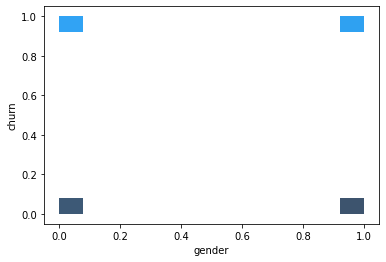

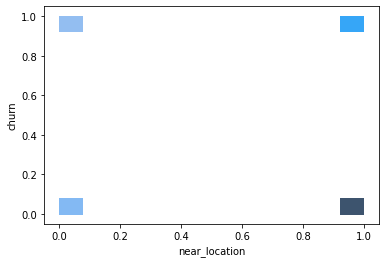

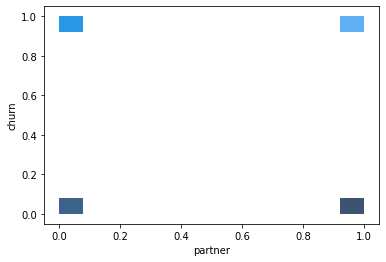

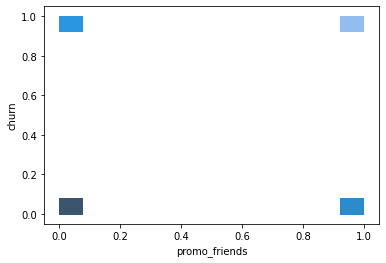

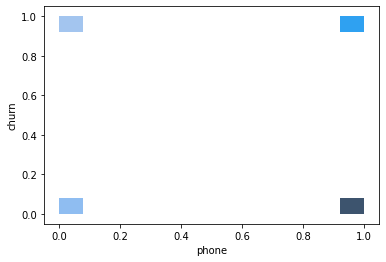

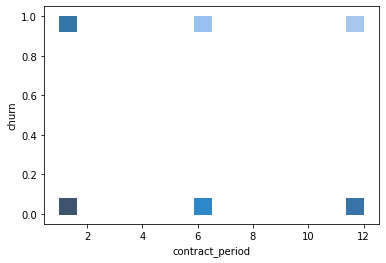

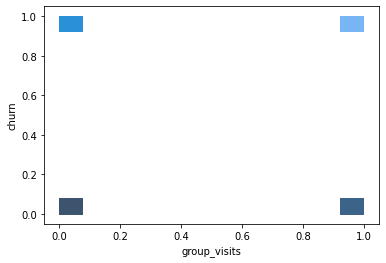

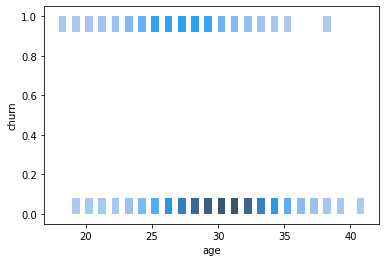

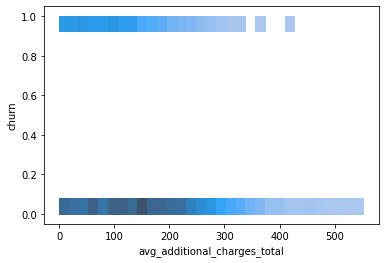

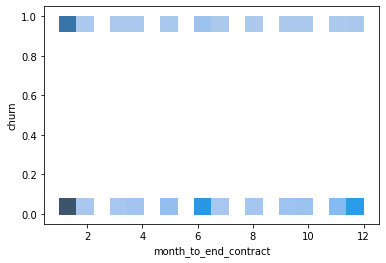

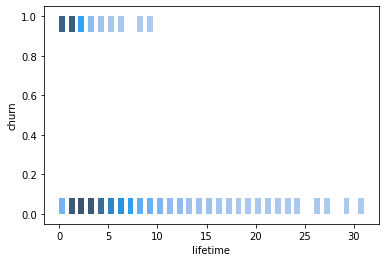

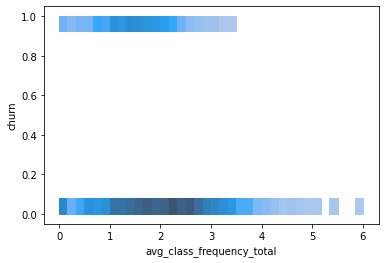

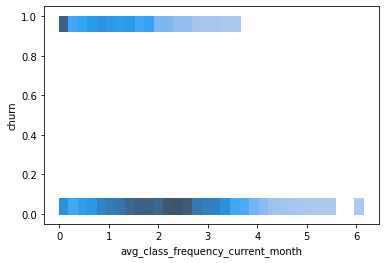

In [12]:
#построим 'столбчатые' гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
for row in df.drop('churn', axis = 1).columns:
    sns.histplot(x=df[row], y=df['churn'])#ваш код здесь
    plt.show()

Из визуализации видно:
* 1) в оттоке меньше пользователей, чем оставшихся;
* 2) много пользователей остаётся, которые живут рядом;
* 3) пользователи от партнёров более живучие, чем пришедшие со стороны;
* 4) живучие пользователи берут продолжительные абонементы, так настроены на успех;
* 5) постоянные пользователи ценят групповые занятия;
* 6) возрастная категория пользователей, которые остаются переваливает за 30, и таких не мало.
* 7) оставшиеся пользователи хорошо тратят на сторонние услуги и товары в ФЦ;
* 8) жизненный цикл у не отвалившихся пользователей доходит до 31 месяца.

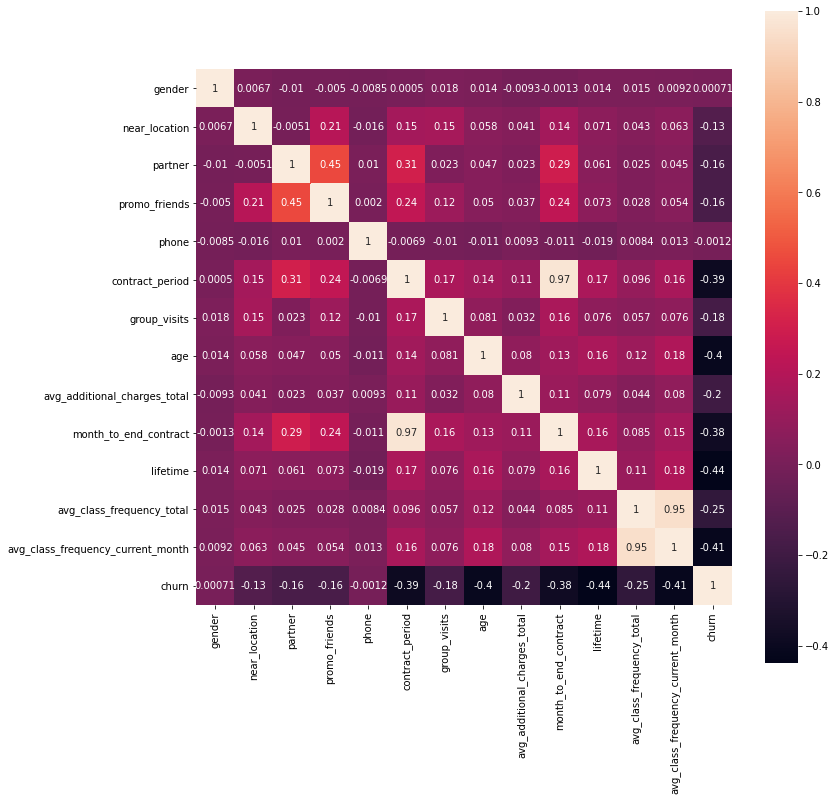

In [13]:
#построим и отрисуем матрицу корреляций
dfm = df.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(12,12))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(dfm, annot=True, square=True)
ax.set_xlim(
    0, 14
)
ax.set_ylim(
    14, 0
)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

### Промежуточный вывод:

 * Размер датасета - 422 kb;
 * Признаки не обезличены, их 13;
 * Тип признаков - числовые. Присутсвуют категориальные признаки, но они уже обработаны и переведены в числовые;
 * Пропущенных значений нет.

У нас есть датасет с 4000 наблюдений. Он содержит 13 признаков(матрица вектора x) и 1 целевую переменную(вектор y).

Для 13 признаков должно быть, как минимум 130 наблюдений. Они у нас есть, даже больше (4000). Соответственно, использование  ML в данном случае оправданно. Кол-во данных позволяет это реализовать.


<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание"><span class="toc-item-num"></span><Вернуться к содержанию</a>

# Шаг 3. Построим модель прогнозирования оттока клиентов

# Разобьём данные на обучающую и валидационную выборку

In [14]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis=1)
y = df['churn']

# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Проверим правильность разбивки данных:

In [15]:
print("Разрешение тренировочного датасета на входе:", X_train.shape)
print("Разрешение тестового датасета на входе:", X_test.shape)
print("Разрешение тренировочного датасета на выходе:", y_train.shape)
print("Разрешение тестового датасета на выходе:", y_test.shape)

Разрешение тренировочного датасета на входе: (3200, 13)
Разрешение тестового датасета на входе: (800, 13)
Разрешение тренировочного датасета на выходе: (3200,)
Разрешение тестового датасета на выходе: (800,)


## Пропорция 20 на 80 выдержана (800 на 3200).

## Обучим модель на train-выборке двумя способами:

 * Логистическая регрессия

In [16]:
# зададим алгоритм для нашей модели
lr_model = LogisticRegression(solver='liblinear', random_state = 0)

# обучим модель
lr_model.fit(X_train, y_train)

# сделаем прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

#print(lr_predictions)
#print(lr_probabilities)

 * Случайный лес

In [17]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 110, max_features=13, max_depth=50, random_state = 0) # Ваш код здесь

# обучим модель
rf_model.fit(X_train, y_train)

# сделаем прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

#print(rf_predictions)
#print(rf_probabilities)

## Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Выясним какая модель показала себя лучше на основании метрик.

In [18]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [19]:
print('Размер датасета:', df.shape)
display(df.head())

# посмотрим, как соотносятся классы набора данных
print('Соотношение классов:\n', df['churn'].value_counts())
print()

# логистическая регрессия
print_all_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:',
)
print()
# случайный лес
print_all_metrics(
    y_test,
    rf_predictions, 
    title='Метрики для модели случайного леса:'
)

Размер датасета: (4000, 14)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64

Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83

Метрики для модели случайного леса:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.86


## Вывод:
По показателям эффектиности метрик выше мы видим, что модель обученная на основе алгоритма случайного леса выдаёт большие показатели, чем модель логистический регрессии. 

Капнём дальше, если запускать на базовых параметрах RandomForestClassifier(n_estimators = 100,  random_state = 0), то показатели её будут хуже, чем у логистической регрессии в нынешних настройках. Путём перебора большого количества параметров "случайный лес" был выведен в лучшую позицию, т.е. был обучен более старательно и выдал данные другого порядка. 

В условиях данной задачи, Яндекс не ставил необходимость играть так с параметрами и указал, что нужен только параметр "random_state = 0"(но было увлекательно отойти от этого, остался вопрос по поводу переобучения на выборке, что-то теряется ли, качество, например?). 

Каков итог - модель логистической регрессии на базовых настройках эффективнее, чем модель случайного леса(на базовых настройках).

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание"><span class="toc-item-num"></span><Вернуться к содержанию</a>

# Шаг 4. Сделаем кластеризацию клиентов

## Стандартизируем данные:

In [20]:
# создадим объект класса StandardScaler
scaler = StandardScaler()

# обучаем scaler и одновременно трансформируем матрицу признаков
X_st = scaler.fit_transform(X) 

## Построим матрицу расстояний и нарисуем дендрограмму:

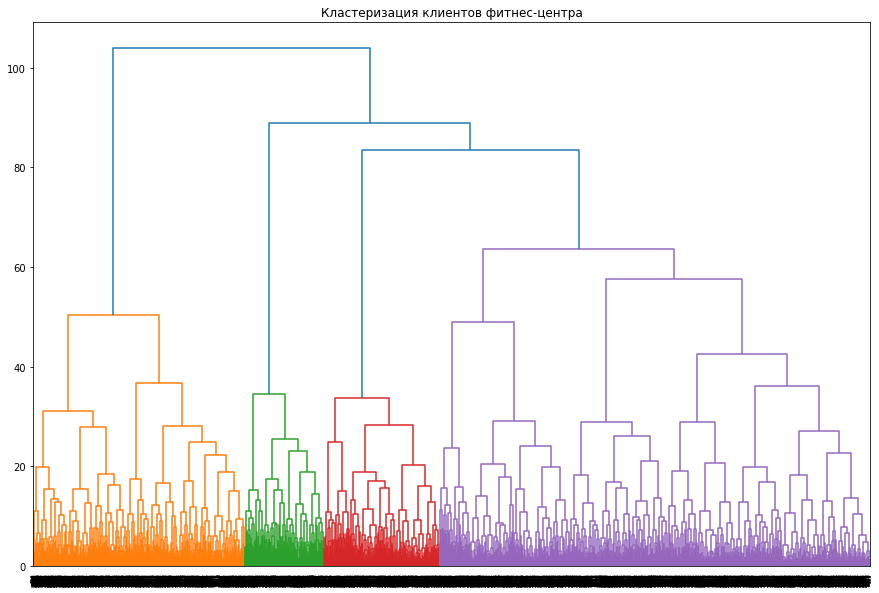

In [21]:
linked = linkage(X_st, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов фитнес-центра')
plt.show()

## Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [22]:
# стандартизируем данные
# sca = StandardScaler()
# x_s = sca.fit_transform(X)

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters = 5, random_state = 0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_st)

# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = df.groupby(['cluster']).mean()
clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457267,2.198020,2.809901,1.660436,1.477030,0.443564
1,0.484512,1.000000,0.351072,0.237490,1.000000,1.954726,0.341541,28.165210,131.444162,1.862589,2.430500,1.246315,1.011136,0.515488
2,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957688,4.475325,3.924675,1.846909,1.716364,0.267532
3,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881884,9.983051,4.748754,1.977617,1.970040,0.027916
4,0.560142,0.976415,0.359670,0.238208,0.998821,2.685142,0.469340,30.110849,161.665755,2.476415,4.889151,2.846580,2.845059,0.067217


## Вывод:

Данные были стандартизированы, класстеризация произведена, было выделано 5 класстеров.

К оттоку наиболее сильно расположены первые 2 класстера.

Честно говоря, не до конца понял фишки по умолчанию n_clusters=5, когда по дендрограмме видно 4 кластера...

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание"><span class="toc-item-num"></span><Вернуться к содержанию</a>

# Шаг 5. Выводы и рекомендации

Данные были загружены, дубликатов и пропусков в них не выявлено. Названия столбцов были приведены к читабельному виду(snake_case). Число знаков после запятых сокращено путём округления и в одном случае путём измения типа данных.

 * Размер датасета - 422 kb;
 * Признаки не обезличены, их 13;
 * Тип признаков - числовые. Присутсвуют категориальные признаки, но они уже обработаны и переведены в числовые;
 * Пропущенных значений нет.

У нас есть датасет с 4000 наблюдений. Он содержит 13 признаков(матрица вектора x) и 1 целевую переменную(вектор y).

Для 13 признаков должно быть, как минимум 130 наблюдений. Они у нас есть, даже больше (4000). Соответственно, использование  ML в данном случае оправданно. Кол-во данных позволяет это реализовать.

По показателям эффектиности метрик выше мы видим, что модель обученная на основе алгоритма случайного леса выдаёт большие показатели, чем модель логистический регрессии. 

Капнём дальше, если запускать на базовых параметрах RandomForestClassifier(n_estimators = 100,  random_state = 0), то показатели её будут хуже, чем у логистической регрессии в нынешних настройках. Путём перебора большого количества параметров "случайный лес" был выведен в лучшую позицию, т.е. был обучен более старательно и выдал данные другого порядка. 

В условиях данной задачи, Яндекс не ставил необходимость играть так с параметрами и указал, что нужен только параметр "random_state = 0"(но было увлекательно отойти от этого, остался вопрос по поводу переобучения на выборке, что-то теряется ли, качество, например?). 

Каков итог - модель логистической регрессии на базовых настройках эффективнее, чем модель случайного леса(на базовых настройках).

Данные были стандартизированы, класстеризация произведена, было выделано 5 класстеров.

К оттоку наиболее сильно расположены первые 2 класстера.

### Портрет отвалившегося пользователя фитнес-центра(далее в тексте - ФЦ):
 * 1) пол - муж/жен;
 * 2) живёт/ работает рядом с  ФЦ;
 * 3) пришёл не в рамках акции «приведи друга»;
 * 4) указан контактный телефон;
 * 5) длительность текущего действующего абонемента в среднем - 2.15;
 * 6) групповые занятие не по душе;
 * 7) средний возраст - 28 лет;
 * 8) суммарная выручка от других услуг ФЦ меньше, чем кто остался;
 * 9) кол-во месяцев до окончания абонемента - в среднем 2;
 * 10) средняя частота посещений в неделю за все время с начала действия абонемента - 1.45(в среднем нет большой заинтересованности, чем у тех кто остался);
 * 11) средняя частота посещений в неделю за предыдущий месяц - 1.25(частота сокращается, приходит понимание);
 * 12) не сотрудник компании-партнёра клуба;
 * 13) время с момента первого обращения в ФЦ - 2.6 месяца.

## Как жить дальше, чтобы пользователь в дальнейшем не отваливался?

* ввести мотивацию за приглашение друга. Чтобы появился бонус(скидка) на оплату следующего абонемента себе;

вопрос не всегда упирается в скидку на новый абонемент, проблема в поиске мотивации, когда ты не один, проще её найти, если есть соратники...

* проработать групповые занятия, нужно привлечь группу людей, которые почему-то не ходят на них;

может быть, клиенты не знают, что есть групповые занятия, или есть какие-то предубеждения, нужно заинтересовать их. Так как там они смогут найти себе единомышленников и будет стимул ходить дальше, находить силы, равняться на кого-то, быть примером.

* проработать продажи(помониторить цены, ввести накопительную систему бонусов, которыми можно будет оплатить часть абонемента или других товаров), заинтересовать товарами, подробно объяснить, чем они могут помочь(спортивное питание, например)

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание"><span class="toc-item-num"></span><Вернуться к содержанию</a>